# Carga de imagenes

In [2]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas
from PIL import Image

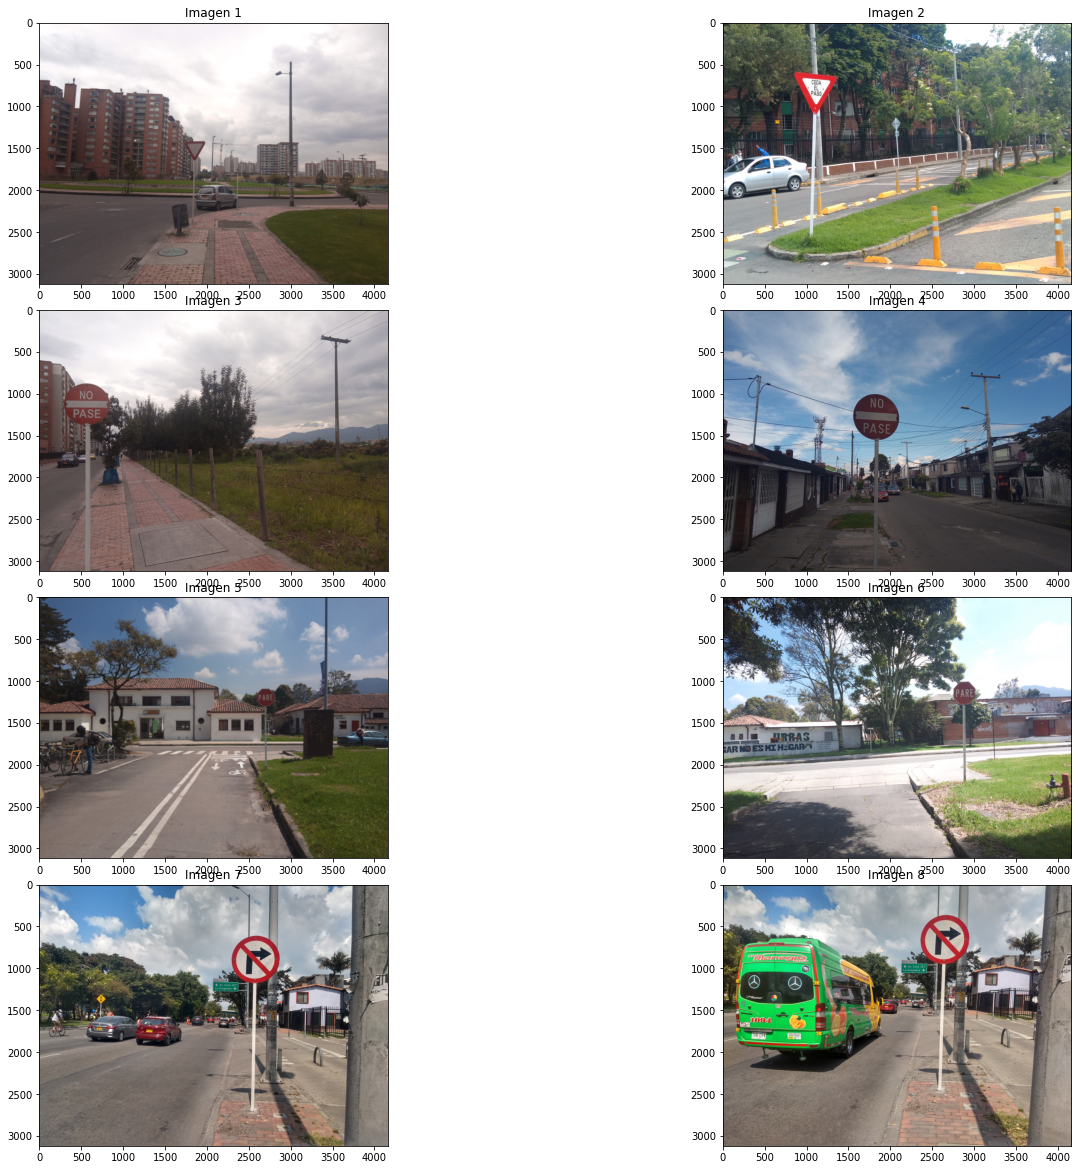

In [3]:
#lectura de las imágenes
ima1=cv2.imread("img/Cedapaso1.jpg")
ima2=cv2.imread("img/Cedapaso2.jpg")
ima3=cv2.imread("img/Nopase1.jpg")
ima4=cv2.imread("img/Nopase2.jpg")
ima5=cv2.imread("img/Pare1.jpg")
ima6=cv2.imread("img/Pare2.jpg")
ima7=cv2.imread("img/Prohibidogiroder1.jpg")
ima8=cv2.imread("img/Prohibidogiroder2.jpg")
ima9=cv2.imread("img/ima9.jpg")
ima10=cv2.imread("img/ima10.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
ima8=cv2.cvtColor(ima8,cv2.COLOR_BGR2RGB)
ima9=cv2.cvtColor(ima9,cv2.COLOR_BGR2RGB)
ima10=cv2.cvtColor(ima10,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplot(4,2,7);plt.imshow(ima7),plt.title('Imagen 7')
plt.subplot(4,2,8);plt.imshow(ima8),plt.title('Imagen 8')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Pre-Procesamiento de imagenes

## Aumento de brillo

In [4]:
#Función para aumentar brillo
def hsvBrightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

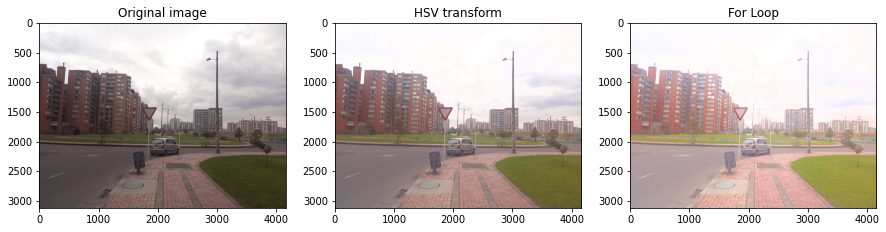

In [5]:
#Impresión de imagenes con brillo
img_br1 = hsvBrightness(ima1, 50)
img_br2 = hsvBrightness(ima1, 100)
plt.figure(figsize=(15,6))
plt.subplot(131), plt.title('Original image'), plt.imshow(ima1);
plt.subplot(132), plt.title('HSV transform'), plt.imshow(img_br1);
plt.subplot(133), plt.title('For Loop'), plt.imshow(img_br2);

## Espacio HSV

In [6]:
def umbral_hsv_rojo(imagen):
    redBajo1 = np.array([0,85,10],np.uint8) 
    redAlto1 = np.array([8,255,255],np.uint8)
    redBajo2 = np.array([165,85,10],np.uint8) 
    redAlto2 = np.array([180,255,255],np.uint8) 
    img_hsv = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    maskRed1 = cv2.inRange(img_hsv, redBajo1, redAlto1)
    maskRed2 = cv2.inRange(img_hsv, redBajo2, redAlto2)
    maskRed = cv2.add(maskRed1,maskRed2)
    #res= cv2.bitwise_and(imagen,imagen,maskRed=maskRed)
    plt.figure();
    plt.imshow(imagen),plt.xticks([]), plt.yticks([])
    plt.figure();
    plt.subplot(1,2,1);plt.imshow(maskRed, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
    #plt.subplot(1,2,2);plt.imshow(res),plt.title('2'),plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    return maskRed

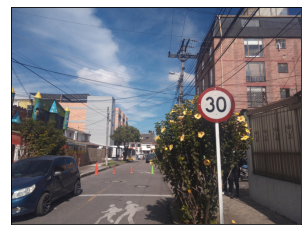

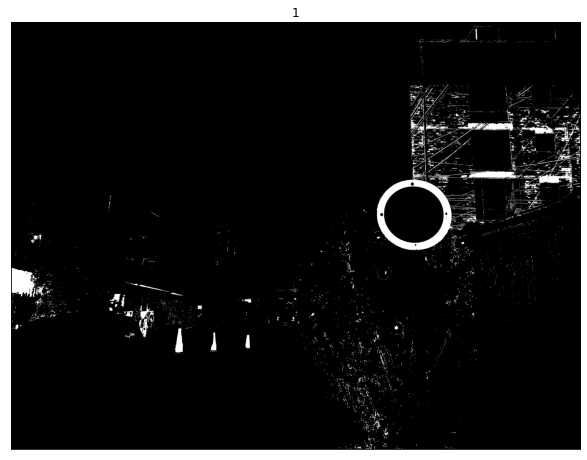

In [99]:
ima_hsv_red = umbral_hsv_rojo(ima9)

## Operaciones morfológicas: Cierre + erosion + apertura

In [100]:
def erosion(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.erode(imagen,kernel1,n)
    elipse = cv2.erode(imagen,kernel2,n)
    cross = cv2.erode(imagen,kernel3,n)
    return rect, elipse, cross

In [101]:
def dilatacion(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.dilate(imagen,kernel1,n)
    elipse = cv2.dilate(imagen,kernel2,n)
    cross = cv2.dilate(imagen,kernel3,n)
    return rect, elipse, cross

In [102]:
def apertura(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel1)
    elipse = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel2)
    cross = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel3)
    return rect, elipse, cross

In [103]:
def cierre(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel1)
    elipse = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel2)
    cross = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel3)
    return rect, elipse, cross

(<matplotlib.image.AxesImage at 0x1d31f84b320>, Text(0.5, 1.0, 'Cierre'))

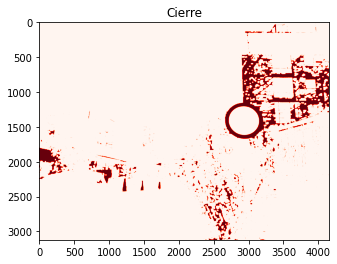

In [104]:
[rect, elipse, cross]=cierre(ima_hsv_red,17,17,3)
img_cierre=rect.copy()
plt.imshow(img_cierre, cmap = "Reds"),plt.title('Cierre')

(<matplotlib.image.AxesImage at 0x1d31d76af98>, Text(0.5, 1.0, 'Erosión'))

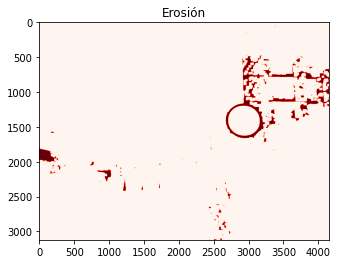

In [105]:
[rect, elipse, cross]=erosion(img_cierre,18,18,10)
img_erosion=rect.copy()
plt.imshow(img_erosion, cmap = "Reds"),plt.title('Erosión')

(<matplotlib.image.AxesImage at 0x1d31de5dc50>, Text(0.5, 1.0, 'Apertura'))

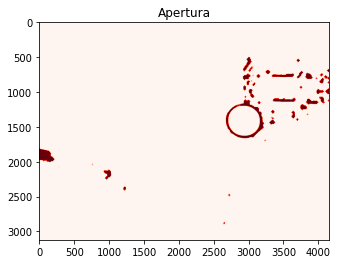

In [106]:
[rect, elipse, cross]=apertura(img_erosion,30,30,10)
img_apertura=cross.copy()
plt.imshow(img_apertura, cmap = "Reds"),plt.title('Apertura')

## Rellenado de imagen

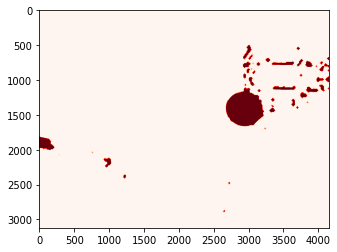

In [107]:
im_floodfill = img_apertura.copy()

h, w = img_apertura.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

 # Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

 # Invert floodfilled image

im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.

im_out = img_apertura | im_floodfill_inv

# Display images.

#plt.imshow("Thresholded Image", img_apertura)
#plt.imshow("Floodfilled Image", im_floodfill)
#plt.imshow("Inverted Floodfilled Image", im_floodfill_inv)
plt.imshow(im_out, cmap = "Reds")
#plt.waitKey(0)

## Hough circle

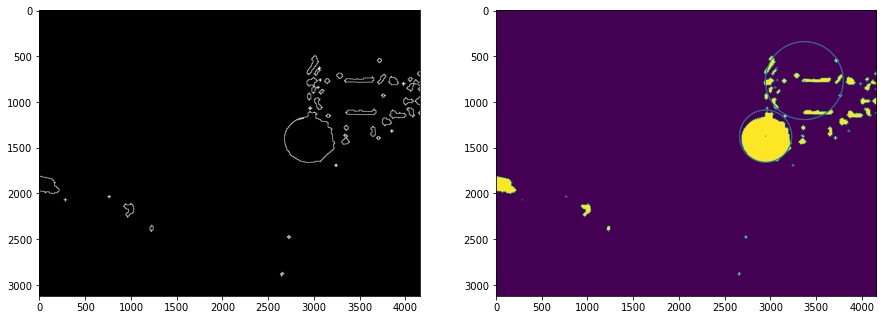

In [109]:
def houghCircles(img):
    #retval, imgT = cv.threshold(cv.cvtColor(img, cv.COLOR_RGB2GRAY), 100, 255, cv.THRESH_BINARY_INV)
    imgW = cv2.Canny(img, 50, 255)
    
    ste = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
    imgD = cv2.dilate(imgW, ste, iterations=1)
    imgL = img.copy()
    imgB = np.zeros(imgD.shape, dtype=np.uint8)
    circles = cv2.HoughCircles(imgW, cv2.HOUGH_GRADIENT, 1, minDist=50,
                              param1=100, param2=40, minRadius=250, maxRadius=0)
    circles = np.uint16(np.around(circles))
    
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(imgL,(i[0],i[1]),i[2],(100,255,0),10)
        #cv2.circle(imgB,(i[0],i[1]),i[2],(0,255,0),10)
        # draw the center of the circle
        cv2.circle(imgL,(i[0],i[1]),2,(100,0,255),8)
        #cv2.circle(imgB,(i[0],i[1]),2,(0,0,255),3)
    
    # Plot
    plt.figure(figsize=(15,6))
    plt.subplot(121), plt.imshow(imgD, cmap='gray')
    plt.subplot(122), plt.imshow(imgL)
    #plt.subplot(133), plt.imshow(imgB)
    
houghCircles(im_out)
#houghCircles(imglist[7])

## Contornos

In [ ]:
#contours, _ = cv2.findContours(im_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Visualización de los contornos
#cv2.drawContours (im_out, contours, -1, (0, 255, 0), 3)
#plt.imshow(im_out, cmap='gray')

def segmentation(img1_resize,img1_open,e,f):

    #Calcular los bordes
    #edges = cv2.Canny(img1_open,e,f)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(e,f))
    edges = cv2.morphologyEx(img1_open, cv2.MORPH_GRADIENT, kernel)
    img_countours = img1_resize.copy()
    
    #Detección del contorno
    contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    
    #Visualización de los contornos
    cv2.drawContours (img_countours, contours, 15, (0, 255, 0), 20) 
    
 
    # MOSTRAR IMÁGEN
    # Visualización de las imágenes
    plt.figure(1)
    plt.subplot(1,4,1), plt.imshow(edges, cmap='gray'), plt.title('Bordes')
    plt.subplot(1,4,2), plt.imshow(img_countours, cmap='gray'), plt.title('Contorno')
    
    # Se ajustan los subplots en el layout
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    plt.show()
    
    return contours

In [ ]:
contours1 = segmentation(ima9,im_out,5,5)



In [ ]:
contours1

In [384]:
len(contours1)

44

In [385]:
maxim = 0
index = None
for i in range(len(contours1)):
    a = contours1[i].size
    if (a > maxim):
        maxim = a
        index = i   
print(maxim)        
print(index)

4054
15


In [386]:
contours1[15].size

4054

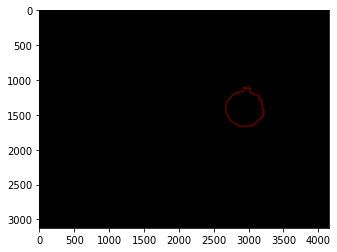

In [392]:
markers = np.zeros(ima9.shape, dtype=np.int32)
cv2.drawContours(markers, contours1, 15, 100, 20)
plt.imshow(markers1, cmap = "gray")


In [397]:
circles = cv2.HoughCircles(markers,cv2.HOUGH_GRADIENT,1,20,param1=20,param2=20,minRadius=10,maxRadius=40)
circles = np.uint16(np.around(circles))
#print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(markers,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(markers,(i[0],i[1]),2,(0,0,255),3)
print(len(circles[0,:]))

cv2.imshow('detected circles',ima9)


84


In [365]:
type(markers)

numpy.ndarray

In [391]:
markers

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])